# RGI03 (Arctic Canada North)

F. Maussion & S. Galos

In [1]:
import pandas as pd
import geopandas as gpd
import subprocess
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from utils import mkdir, submission_summary, needs_size_filter, size_filter, plot_map, plot_date_hist
import os

## Files and storage paths

In [2]:
# Region of interest
reg = 3

# go down from rgi7_scripts/workflow
data_dir = '../../rgi7_data/'

# Level 2 GLIMS files
l2_dir = os.path.join(data_dir, 'l2_sel_reg_tars')

# Output directories
output_dir = mkdir(os.path.join(data_dir, 'l3_rgi7a'))
output_dir_tar = mkdir(os.path.join(data_dir, 'l3_rgi7a_tar'))

# RGI v6 file for comparison later 
rgi6_reg_file = os.path.join(data_dir, 'l0_RGIv6', '03_rgi60_ArcticCanadaNorth.zip')

# Supporting shapes and data
support_dir = os.path.join(data_dir, 'l0_support_data')

### Load the input data

In [3]:
# Read L2 files
shp = gpd.read_file('tar://' + l2_dir + f'/RGI{reg:02d}.tar.gz/RGI{reg:02d}/RGI{reg:02d}.shp')

### List of submissions 

In [4]:
sdf, _ = submission_summary(shp)
sdf

,N,A,analysts,submitters,release_date,geog_area,src_date_mode,src_date_min,src_date_max
subm_id,,,,,,,,,
255,626,11927.7,Hartman,Hartman,2006,Canada,1999,1999,1999
356,200,3414.5,Hartman,Hartman,2006,Canada,1997,1997,1997
358,178,19021.4,Hartman,Hartman,2006,Canada,1999,1999,1999
359,183,5710.7,Cawkwell,Hartman,2006,Canada,2002,2002,2002
590,4541,105021.9,"Barrand, Burgess, Cawkwell, Copland, Filbert, ...",Bolch,2015,Randolph Glacier Inventory; Umbrella RC for me...,1999,1999,1999
625,4,22.2,"Braun, Raup",Raup,2016,Various (NSIDC),1959,1959,1959
626,4,13.3,"Bradley, Braun, Hardy",Raup,2016,Various (NSIDC),2001,2001,2001
627,2,6.9,Raup,Raup,2016,Various (NSIDC),2001,2001,2001
628,2,4.7,Raup,Raup,2016,Various (NSIDC),2005,2005,2005


Notes based on inidivual submission evaluations: 

- 590: This is the RGI, without Melville Island
- 635: are seven glaciers on Melville Island, yet not what is used by RGI6 (RGI6 outlines for Melville are not available in GLIMS)
- 660, 661: also Melville Island. A bit further to 2000 than 635.
- 728: Three parts: Elsemere (Central), Axel Heiberg, Ellesmere (South West). To be used in RGI7?
- 723: Ellesmere North - to be used in RGI7
- 713, 712, 711: Ellesmere North - too late, not for RGI7

In [5]:
# # Write out selection in intermediate shape files for manual GIS review
# tmp_output_dir = mkdir(os.path.join(data_dir, 'l0_tmp_data', f'rgi{reg:02d}_inventories'))
# tmp_output_dir_tar = mkdir(os.path.join(data_dir, 'l0_tmp_data'))
# for subid in shp.subm_id.unique():
#     s_loc = shp.loc[shp.subm_id == subid]
#     s_loc.to_file(tmp_output_dir + f'/subm_{int(subid):03d}.shp')
# print('Taring...')
# print(subprocess.run(['tar', '-zcvf', f'{tmp_output_dir_tar}/rgi{reg:02d}_inventories.tar.gz', '-C', 
#                       os.path.join(data_dir, 'l0_tmp_data'), f'rgi{reg:02d}_inventories']))

### Read in the geometry data for sub-inventory selection 

In [6]:
# Read L2 files
shp_loc = gpd.read_file('tar://' + support_dir + f'/sub_inventory_sel_RGI03.tar.gz/sub_inventory_sel_RGI03.shp')

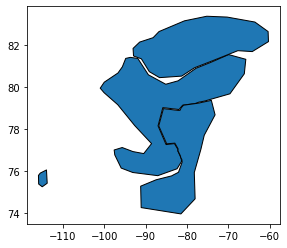

In [7]:
shp_loc.plot(edgecolor='k');

In [8]:
shp_loc

,id,info,subm_id,geometry
0,0,Melville,635,"POLYGON ((-115.87499 75.78899, -115.42617 75.8..."
1,1,None,728,"POLYGON ((-93.67317 81.39727, -91.87755 81.346..."
2,2,Ellesmere North,723,"POLYGON ((-92.90937 81.46119, -93.02105 81.821..."
3,4,None,590,"POLYGON ((-82.15135 78.87694, -81.67968 78.879..."


In [9]:
# Test the polygons I drew - each subregion should be equivalent as the sel by id
# (Except RGI6 which will be replaced in parts)
for sub_id in [635, 728, 723]:
    sel = shp.loc[shp['subm_id'] == sub_id].copy()
    rp = sel.representative_point().to_frame('geometry')
    rp['orig_index'] = sel.index
    intersect = gpd.overlay(rp, shp_loc.loc[shp_loc['subm_id'] == sub_id], how='intersection')
    odf = sel.loc[intersect['orig_index']]
    assert len(sel) == len(odf)

### Apply selection criteria to create the RGI7 data subset

In [21]:
# Melville
rgi7_Melville = shp.loc[shp['subm_id'].isin([635])].copy()
print(len(rgi7_Melville))
rgi7_Melville = size_filter(rgi7_Melville)
print(len(rgi7_Melville))

rgi7_Melville['is_rgi6'] = False

7
7


In [22]:
# Ellesmere North
rgi7_North = shp.loc[shp['subm_id'].isin([723])].copy()
print(len(rgi7_North))
rgi7_North = size_filter(rgi7_North)
print(len(rgi7_North))

rgi7_North['is_rgi6'] = False

2583
2583


In [23]:
# Ellesmere Central + Axel Heiberg
rgi7_Central = shp.loc[shp['subm_id'].isin([728])].copy()
print(len(rgi7_Central))
rgi7_Central = size_filter(rgi7_Central)
print(len(rgi7_Central))

rgi7_Central['is_rgi6'] = False

1968
1961


In [24]:
# Rest (Devon, East, etc)
rgi7_South = shp.loc[shp['subm_id'].isin([590])].copy()
print(len(rgi7_South))

# Sel by canvas
rp = rgi7_South.representative_point().to_frame('geometry')
rp['orig_index'] = rgi7_South.index
intersect = gpd.overlay(rp, shp_loc.loc[shp_loc['subm_id'] == 590], how='intersection')
rgi7_South = rgi7_South.loc[intersect['orig_index']]

# Sel by size
print(len(rgi7_South))
rgi7_South = size_filter(rgi7_South)
print(len(rgi7_South))

rgi7_South['is_rgi6'] = True

4541
656
656


In [25]:
# combine the geodataframes
rgi7 = pd.concat([rgi7_Melville, rgi7_North, rgi7_Central, rgi7_South])

### Some sanity checks 

In [26]:
sdf, df_class = submission_summary(rgi7)
df_class

,N,N NA
subm_id,,
635,7,7
723,2583,2583
728,1961,1961
590,656,656


In [27]:
# Check the orphaned rock outcrops
orphan_f = os.path.join(data_dir, 'l1_orphan_interiors', f'RGI{reg:02d}', f'RGI{reg:02d}.shp')
if os.path.exists(orphan_f):
    orphan_f = gpd.read_file(orphan_f)
    check = np.isin(rgi7.subm_id.unique(), orphan_f.subm_id.unique())
    if np.any(check):
        print(f'Orphan rock outcrops detected in subm_id {rgi7.subm_id.unique()[check]}')
        orphan_f['area'] = orphan_f.to_crs({'proj':'cea'}).area

### Plots 

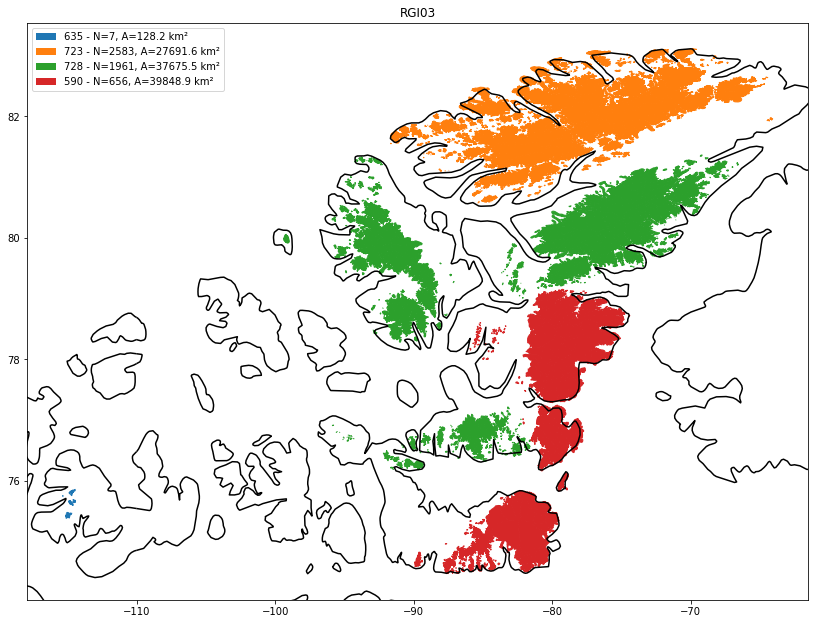

In [28]:
plot_map(rgi7, reg, loc='upper left')

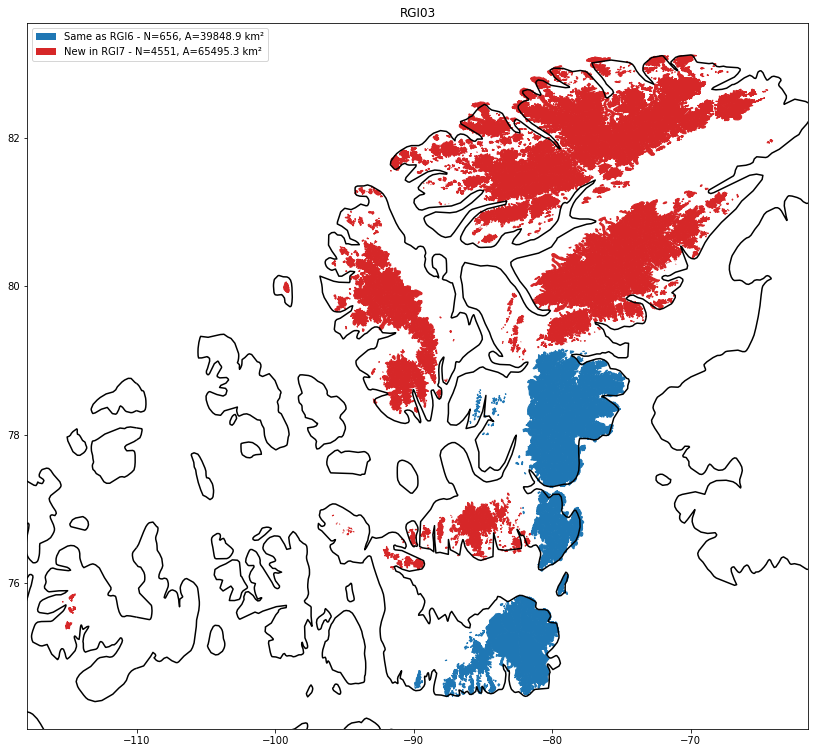

In [29]:
plot_map(rgi7, reg, loc='upper left', is_rgi6=True)

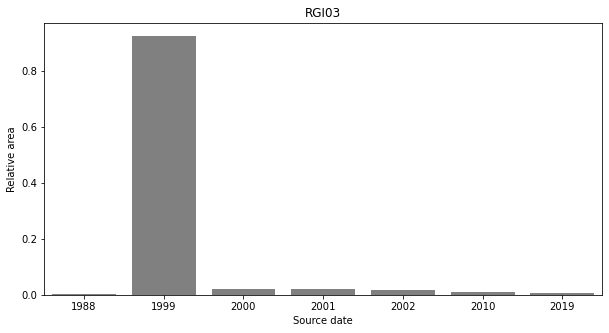

In [30]:
plot_date_hist(rgi7, reg)

### Text for github

In [31]:
fgh = sdf.T
fgh

subm_id,635,723,728,590
N,7,2583,1961,656
A,128.2,27691.6,37675.5,39848.9
analysts,"Berthier, Bolch, Cogley, Kienholz","Paul, Rastner, White","Copland, Kochtitzky, Thomson, Zajaczkiwsky","Barrand, Burgess, Cawkwell, Copland, Filbert, ..."
submitters,Cogley,Paul,Kochtitzky,Bolch
release_date,2015,2021,2021,2015
geog_area,Randolph Glacier Inventory; Umbrella RC for me...,Various (GlobGlacier),Canada,Randolph Glacier Inventory; Umbrella RC for me...
src_date_mode,1988,1999,1999,1999
src_date_min,1988,1999,1999,1999
src_date_max,1988,2019,2002,1999


In [32]:
print(fgh.to_markdown(headers=np.append(['subm_id'], fgh.columns)))

| subm_id       | 635                                                                    | 723                   | 728                                        | 590                                                                                                     |
|:--------------|:-----------------------------------------------------------------------|:----------------------|:-------------------------------------------|:--------------------------------------------------------------------------------------------------------|
| N             | 7                                                                      | 2583                  | 1961                                       | 656                                                                                                     |
| A             | 128.2                                                                  | 27691.6               | 37675.5                                    | 39848.9                                   

## Write out and tar 

In [33]:
dd = mkdir(f'{output_dir}/RGI{reg:02d}/', reset=True)

print('Writing...')
rgi7.to_file(dd + f'RGI{reg:02d}.shp')

print('Taring...')
print(subprocess.run(['tar', '-zcvf', f'{output_dir_tar}/RGI{reg:02d}.tar.gz', '-C', output_dir, f'RGI{reg:02d}']))

Writing...
Taring...
CompletedProcess(args=['tar', '-zcvf', '../../rgi7_data/l3_rgi7a_tar/RGI03.tar.gz', '-C', '../../rgi7_data/l3_rgi7a', 'RGI03'], returncode=0)


## New RGI-file created - Check result!

### load reference data (here RGI6 and Frank's) to enable comparison

In [35]:
# load reference data
from utils import open_zip_shapefile

# RGI6
ref_rgi6 = open_zip_shapefile(rgi6_reg_file)
# FP
ref_fp = open_zip_shapefile(os.path.join(support_dir, 'c3s_gi_rgi03_l7_1999_v1.zip'))
# Will
ref_wk = open_zip_shapefile(os.path.join(support_dir, 'RGI6_Kochtitzky_final_3Sep2021.zip'))

### Compare new RGI7-file to RGI6

### Number of elements (differences do not depict problems)

In [36]:
print('Number of glaciers in new RGI:', len(rgi7))
print('Number of glaciers in RGI6:', len(ref_rgi6))
print('Difference:', len(rgi7)-len(ref_rgi6))

Number of glaciers in new RGI: 5207
Number of glaciers in RGI6: 4556
Difference: 651


### How many nominal glaciers were there in RGI06?

In [37]:
len(ref_rgi6.loc[ref_rgi6.Status == 2])

0

### Total area

In [39]:
# add an area field to RGI_ss and reference data
ref_rgi6['area'] = ref_rgi6.to_crs({'proj':'cea'}).area
ref_fp['area'] = ref_fp.to_crs({'proj':'cea'}).area
ref_wk['area'] = ref_wk.to_crs({'proj':'cea'}).area

In [40]:
# print and compare area values
Area_RGI = rgi7['area'].sum() * 1e-6
print('Area RGI7 [km²]:', Area_RGI)
Area_ref = ref_rgi6['area'].sum() * 1e-6
print('Area RGI6 [km²]:', Area_ref)
d = (Area_RGI - Area_ref)
print('Area difference [km²]:', d)

Area RGI7 [km²]: 105344.19473743554
Area RGI6 [km²]: 105110.6003049786
Area difference [km²]: 233.59443245694274


### Northern Ellesmere (723, Frank Paul, no problem there):  

In [41]:
print('Number of glaciers in RGI7 subset:', len(rgi7_North))
print('Number of glaciers in reference data (FP):', len(ref_fp))
print('Difference:', len(rgi7_North)-len(ref_fp))

Number of glaciers in RGI7 subset: 2583
Number of glaciers in reference data (FP): 2583
Difference: 0


In [42]:
# print and compare area values
Area_7 = rgi7_North['area'].sum() * 1e-6
print('Area RGI7 [km²]:', Area_7)
Area_6 = ref_fp['area'].sum() * 1e-6
print('Area RGI6 [km²]:', Area_6)
d = (Area_7 - Area_6)
print('Area difference [km²]:', d)

Area RGI7 [km²]: 27691.62871889667
Area RGI6 [km²]: 27691.626610453986
Area difference [km²]: 0.0021084426844026893


This is brilliant! No issue there.

### Central Ellesmere (728, Coppland, no problem there):  

In [43]:
print(len(ref_wk))
ref_wk = ref_wk.loc[np.round(ref_wk['area'] * 1e-6, 3) >= 0.01].copy()
len(ref_wk)

1975


1961

In [44]:
print('Number of glaciers in RGI7 subset:', len(rgi7_Central))
print('Number of glaciers in reference data (FP):', len(ref_wk))
print('Difference:', len(rgi7_Central)-len(ref_wk))

Number of glaciers in RGI7 subset: 1961
Number of glaciers in reference data (FP): 1961
Difference: 0


In [45]:
# print and compare area values
Area_7 = rgi7_Central['area'].sum() * 1e-6
print('Area RGI7 [km²]:', Area_7)
Area_6 = ref_wk['area'].sum() * 1e-6
print('Area RGI6 [km²]:', Area_6)
d = (Area_7 - Area_6)
print('Area difference [km²]:', d)

Area RGI7 [km²]: 37675.53551312567
Area RGI6 [km²]: 37675.539943873904
Area difference [km²]: -0.004430748231243342


This is brilliant! No issue there.

### Southern Ellesmere (590, RGI6, no problem there):  

In [46]:
rp = ref_rgi6.representative_point().to_frame('geometry')
rp['orig_index'] = ref_rgi6.index
intersect = gpd.overlay(rp, shp_loc.loc[shp_loc['subm_id'] == 590], how='intersection')
ref_rgi6_south = ref_rgi6.loc[intersect['orig_index']].copy()

In [47]:
print('Number of glaciers in RGI7 subset:', len(rgi7_South))
print('Number of glaciers in reference data (RGI6):', len(ref_rgi6_south))
print('Difference:', len(rgi7_South)-len(ref_rgi6_south))

Number of glaciers in RGI7 subset: 656
Number of glaciers in reference data (RGI6): 656
Difference: 0


In [48]:
# print and compare area values
Area_7 = rgi7_South['area'].sum() * 1e-6
print('Area RGI7 [km²]:', Area_7)
Area_6 = ref_rgi6_south['area'].sum() * 1e-6
print('Area RGI6 [km²]:', Area_6)
d = (Area_7 - Area_6)
print('Area difference [km²]:', d)

Area RGI7 [km²]: 39848.872315459
Area RGI6 [km²]: 39845.28210181223
Area difference [km²]: 3.5902136467702803


Almost no issue - some weird polygon outcrops here and there. 

### Melville Island (635) not much to compare here

In [49]:
rp = ref_rgi6.representative_point().to_frame('geometry')
rp['orig_index'] = ref_rgi6.index
intersect = gpd.overlay(rp, shp_loc.loc[shp_loc['subm_id'] == 635], how='intersection')
ref_rgi6_melville = ref_rgi6.loc[intersect['orig_index']].copy()

In [50]:
print('Number of glaciers in RGI7 subset:', len(rgi7_Melville))
print('Number of glaciers in reference data (RGI6):', len(ref_rgi6_melville))
print('Difference:', len(rgi7_Melville)-len(ref_rgi6_melville))

Number of glaciers in RGI7 subset: 7
Number of glaciers in reference data (RGI6): 7
Difference: 0


In [51]:
# print and compare area values
Area_7 = rgi7_Melville['area'].sum() * 1e-6
print('Area RGI7 [km²]:', Area_7)
Area_6 = ref_rgi6_melville['area'].sum() * 1e-6
print('Area RGI6 [km²]:', Area_6)
d = (Area_7 - Area_6)
print('Area difference [km²]:', d)

Area RGI7 [km²]: 128.1581899542112
Area RGI6 [km²]: 112.20178989707662
Area difference [km²]: 15.956400057134573


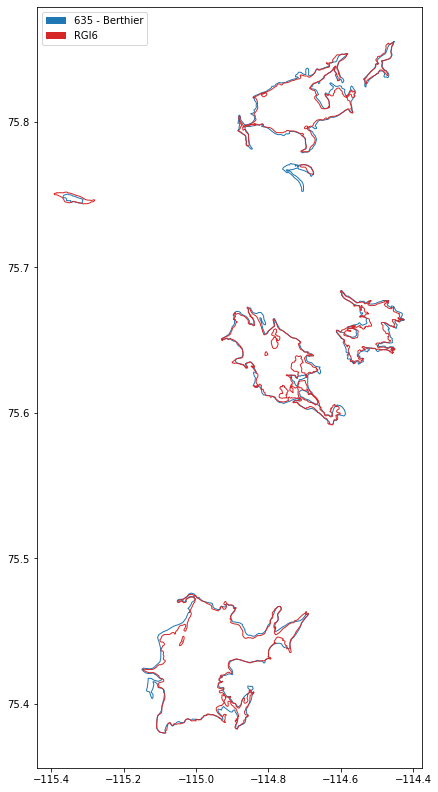

In [52]:
f, ax = plt.subplots(figsize=(14, 14))
rgi7_Melville.plot(ax=ax, facecolor='None', edgecolor='C0');
ref_rgi6_melville.plot(ax=ax, facecolor='None', edgecolor='C3');
ax.legend(handles=[
            mpatches.Patch(facecolor='C0', label='635 - Berthier'),
            mpatches.Patch(facecolor='C3', label='RGI6'),
          ], loc='upper left');